
Welcome to the Supermarket!
1. Owner
2. Customer
3. Exit
Are you an owner or a customer? Enter '1' for owner, '2' for customer, or '3' to exit: 1

Owner Menu:
1. Show Inventory
2. Add Item to Inventory
3. Remove Item from Inventory
4. View Inventory Distribution (Pie Chart)
5. Exit
Enter your choice: 1
Current Inventory:
     Item  Quantity  Price
0   apple        10   30.0
1   mango        20  100.0
2  banana        30  200.0
3    milk        10   25.0
4    cake        25  180.0
5   fruit        20  190.0

Owner Menu:
1. Show Inventory
2. Add Item to Inventory
3. Remove Item from Inventory
4. View Inventory Distribution (Pie Chart)
5. Exit
Enter your choice: 2
Enter the name of the item: gift
Enter the quantity: 56
Enter the price per item: 456
Item added to inventory.

Owner Menu:
1. Show Inventory
2. Add Item to Inventory
3. Remove Item from Inventory
4. View Inventory Distribution (Pie Chart)
5. Exit
Enter your choice: 1
Current Inventory:
     Item  Quantity  Price
0   apple     

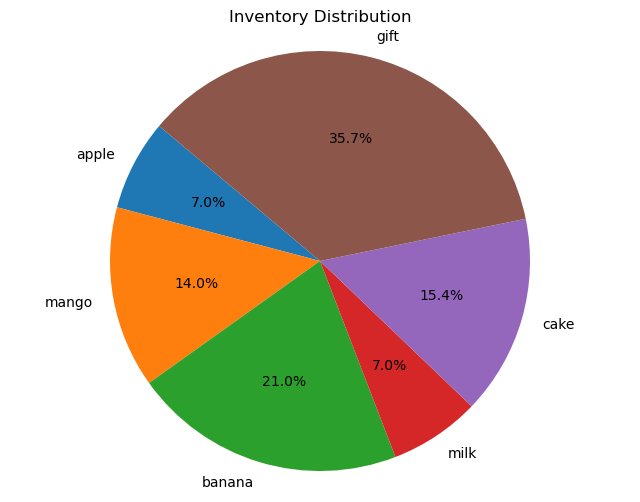


Owner Menu:
1. Show Inventory
2. Add Item to Inventory
3. Remove Item from Inventory
4. View Inventory Distribution (Pie Chart)
5. Exit
Enter your choice: 5

Welcome to the Supermarket!
1. Owner
2. Customer
3. Exit
Are you an owner or a customer? Enter '1' for owner, '2' for customer, or '3' to exit: 3
Thank you for visiting.have a great day!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load inventory data from CSV
inventory_file = 'inventory.csv'
inventory_df = pd.read_csv(inventory_file)

def save_inventory():
    inventory_df.to_csv(inventory_file, index=False)

def show_inventory():
    print("Current Inventory:")
    print(inventory_df)

def owner_menu():
    global inventory_df
    while True:
        print("\nOwner Menu:")
        print("1. Show Inventory")
        print("2. Add Item to Inventory")
        print("3. Remove Item from Inventory")
        print("4. View Inventory Distribution (Pie Chart)")
        print("5. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            show_inventory()
        elif choice == '2':
            item_name = input("Enter the name of the item: ")
            quantity = int(input("Enter the quantity: "))
            price = float(input("Enter the price per item: "))
            new_item_df = pd.DataFrame({'Item': [item_name], 'Quantity': [quantity], 'Price': [price]})
            inventory_df = pd.concat([inventory_df, new_item_df], ignore_index=True)
            print("Item added to inventory.")
            save_inventory()
        elif choice == '3':
            show_inventory()
            item_index = int(input("Enter the index of the item to remove: "))
            inventory_df = inventory_df.drop(item_index)
            print("Item removed from inventory.")
            save_inventory()
        elif choice == '4':
            generate_pie_chart()
        elif choice == '5':
            break
        else:
            print("Invalid choice. Please try again.")

def generate_pie_chart():
    plt.figure(figsize=(8, 6))
    plt.pie(inventory_df['Quantity'], labels=inventory_df['Item'], autopct='%1.1f%%', startangle=140)
    plt.title('Inventory Distribution')
    plt.axis('equal')
    plt.show()

def customer_menu():
    global inventory_df
    total_bill = 0
    while True:
        print("\nCustomer Menu:")
        print("1. Show Inventory")
        print("2. Purchase Items")
        print("3. Generate Bill")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            show_inventory()
        elif choice == '2':
            show_inventory()
            item_name = input("Enter the name of the item you want to purchase: ")
            quantity = int(input("Enter the quantity: "))
            item = inventory_df[inventory_df['Item'] == item_name]
            if item.empty:
                print("Item not found in inventory.")
            elif item.iloc[0]['Quantity'] < quantity:
                print("Insufficient quantity in inventory.")
            else:
                item_cost = item.iloc[0]['Price'] * quantity
                total_bill += item_cost
                inventory_df.loc[inventory_df['Item'] == item_name, 'Quantity'] -= quantity
                print(f"{quantity} {item_name}(s) added to cart.")
        elif choice == '3':
            print("Generating Bill...")
            print("Total Bill: $", total_bill)
            total_bill = 0  # Reset bill for next customer
        elif choice == '4':
            break
        else:
            print("Invalid choice. Please try again.")

# Main program
def main():
    while True:
        print("\nWelcome to the Supermarket!")
        print("1. Owner")
        print("2. Customer")
        print("3. Exit")

        user_type = input("Are you an owner or a customer? Enter '1' for owner, '2' for customer, or '3' to exit: ")

        if user_type == '1':
            owner_menu()
        elif user_type == '2':
            customer_menu()
        elif user_type == '3':
            print("Thank you for visiting.have a great day!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
